<a href="https://colab.research.google.com/github/RenatoSMacedo/ChallengeAluraStoreBr/blob/main/ChallengeAluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# Função para formatar como Real brasileiro
def formatar_reais(valor):
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Cálculo do faturamento por loja
faturamento_loja1 = loja1["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

# Exibição formatada dos resultados
print("Faturamento Loja 1:", formatar_reais(faturamento_loja1))
print("Faturamento Loja 2:", formatar_reais(faturamento_loja2))
print("Faturamento Loja 3:", formatar_reais(faturamento_loja3))
print("Faturamento Loja 4:", formatar_reais(faturamento_loja4))


Faturamento Loja 1: R$ 1.534.509,12
Faturamento Loja 2: R$ 1.488.459,06
Faturamento Loja 3: R$ 1.464.025,03
Faturamento Loja 4: R$ 1.384.497,58


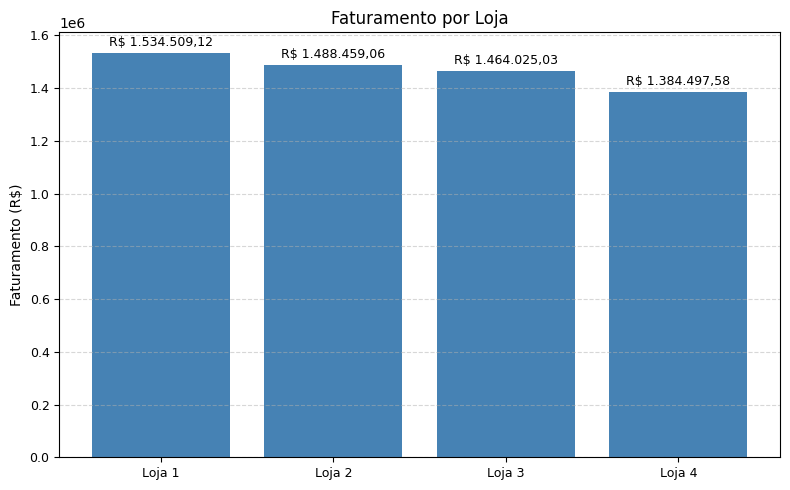

In [3]:
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Criar gráfico
plt.figure(figsize=(8,5))
barras = plt.bar(nomes_lojas, faturamentos, color="steelblue")
plt.title("Faturamento por Loja")
plt.ylabel("Faturamento (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + altura*0.01,
             f"R$ {altura:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()



# 1.1 Quantidade de Vendas por Loja

In [4]:
# Quantidade total de vendas por loja
vendas_loja1 = len(loja1)
vendas_loja2 = len(loja2)
vendas_loja3 = len(loja3)
vendas_loja4 = len(loja4)

# Exibir resultados
print(f"Quantidade total de vendas - Loja 1: {vendas_loja1}")
print(f"Quantidade total de vendas - Loja 2: {vendas_loja2}")
print(f"Quantidade total de vendas - Loja 3: {vendas_loja3}")
print(f"Quantidade total de vendas - Loja 4: {vendas_loja4}")


Quantidade total de vendas - Loja 1: 2359
Quantidade total de vendas - Loja 2: 2359
Quantidade total de vendas - Loja 3: 2359
Quantidade total de vendas - Loja 4: 2358


# 1.2 Distribuição do Faturamento ao longo do tempo

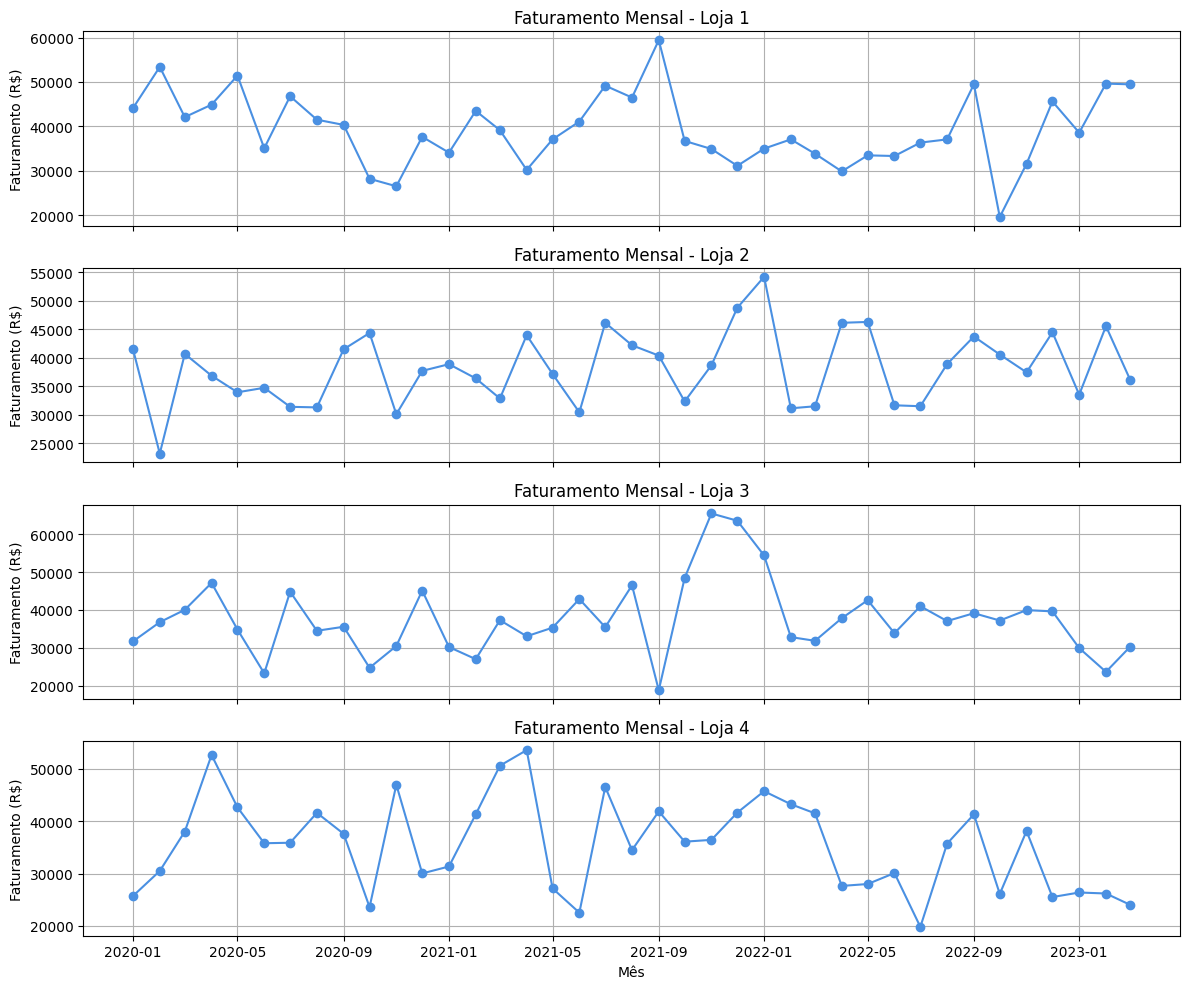

In [5]:

# Converter a coluna de data para datetime
loja1["Data da Compra"] = pd.to_datetime(loja1["Data da Compra"], format="%d/%m/%Y")
loja2["Data da Compra"] = pd.to_datetime(loja2["Data da Compra"], format="%d/%m/%Y")
loja3["Data da Compra"] = pd.to_datetime(loja3["Data da Compra"], format="%d/%m/%Y")
loja4["Data da Compra"] = pd.to_datetime(loja4["Data da Compra"], format="%d/%m/%Y")

# Agrupar por mês
faturamento_mensal_1 = loja1.groupby(loja1["Data da Compra"].dt.to_period("M"))["Preço"].sum().to_timestamp()
faturamento_mensal_2 = loja2.groupby(loja2["Data da Compra"].dt.to_period("M"))["Preço"].sum().to_timestamp()
faturamento_mensal_3 = loja3.groupby(loja3["Data da Compra"].dt.to_period("M"))["Preço"].sum().to_timestamp()
faturamento_mensal_4 = loja4.groupby(loja4["Data da Compra"].dt.to_period("M"))["Preço"].sum().to_timestamp()

# Listas para facilitar o loop
faturamentos = [faturamento_mensal_1, faturamento_mensal_2, faturamento_mensal_3, faturamento_mensal_4]
titulos = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criar subplots: 4 linhas x 1 coluna
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

for i in range(4):
    axs[i].plot(faturamentos[i], marker='o', color='#4a90e2')
    axs[i].set_title(f"Faturamento Mensal - {titulos[i]}")
    axs[i].set_ylabel("Faturamento (R$)")
    axs[i].grid(True)

# Eixo X na parte inferior
plt.xlabel("Mês")
plt.tight_layout()
plt.show()


# 1.3 Faturamento Mensal com Regressão Linear

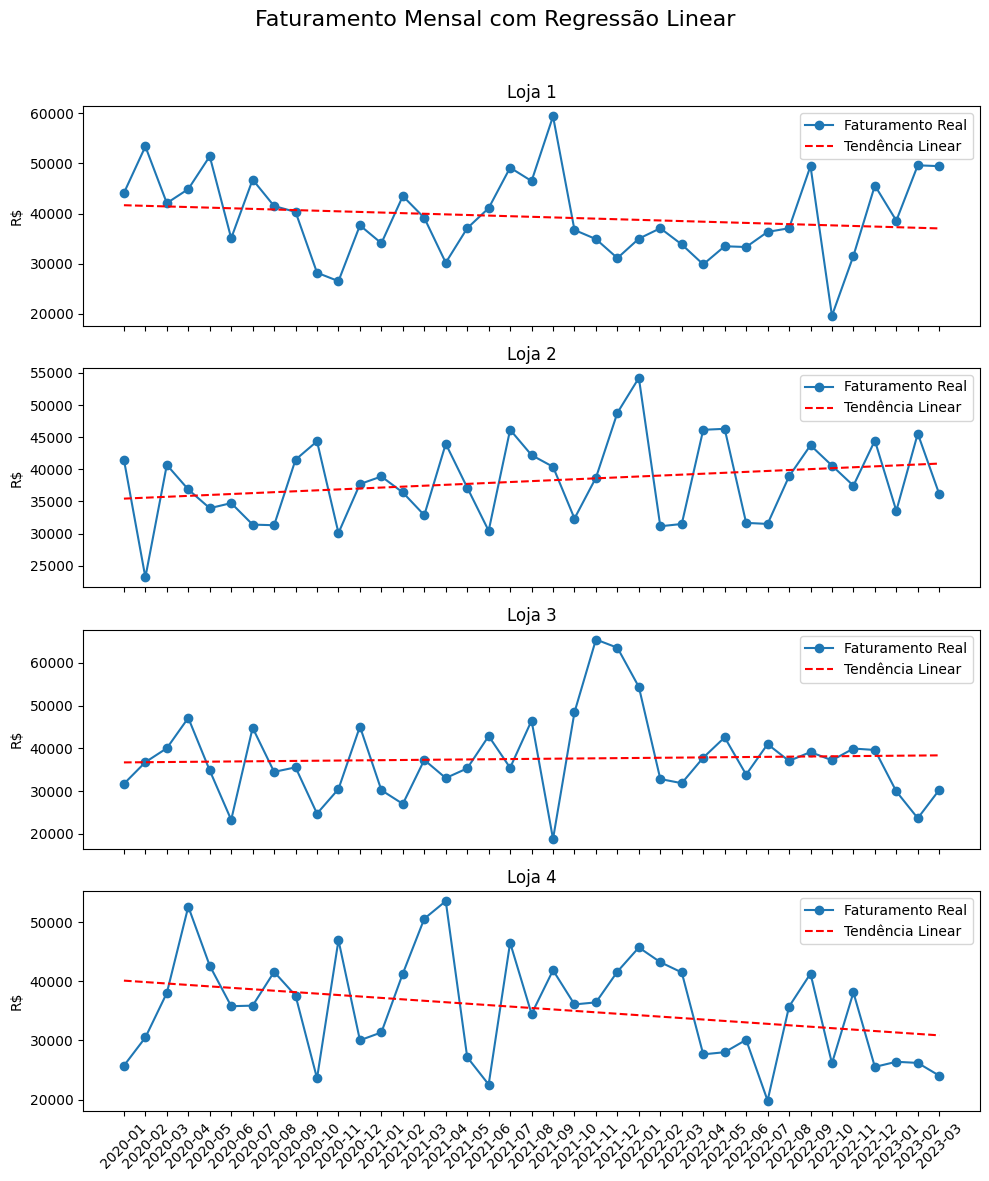

In [6]:
from scipy.stats import linregress
import numpy as np

# URLs dos arquivos
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Função para carregar, processar e aplicar regressão linear
def processar_loja_com_regressao(url):
    df = pd.read_csv(url)
    df["Data da Compra"] = pd.to_datetime(df["Data da Compra"], dayfirst=True)
    df["AnoMes"] = df["Data da Compra"].dt.to_period("M").astype(str)
    faturamento = df.groupby("AnoMes")["Preço"].sum().reset_index()

    # Converter AnoMes em números para regressão (ex: 0,1,2,...)
    faturamento["x"] = range(len(faturamento))
    slope, intercept, _, _, _ = linregress(faturamento["x"], faturamento["Preço"])
    faturamento["Tendência Linear"] = intercept + slope * faturamento["x"]

    return faturamento

# Plotar gráficos
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
fig.suptitle("Faturamento Mensal com Regressão Linear", fontsize=16)

for i, (nome, url) in enumerate(urls.items()):
    df = processar_loja_com_regressao(url)
    axs[i].plot(df["AnoMes"], df["Preço"], marker="o", label="Faturamento Real")
    axs[i].plot(df["AnoMes"], df["Tendência Linear"], color="red", linestyle="--", label="Tendência Linear")
    axs[i].set_title(nome)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
    axs[i].set_ylabel("R$")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



# 2. Vendas por Categoria


In [7]:
# Contagem de vendas por categoria para cada loja
categorias_loja1 = loja1["Categoria do Produto"].value_counts().rename_axis("Categoria").reset_index(name="Quantidade de Vendas")
categorias_loja2 = loja2["Categoria do Produto"].value_counts().rename_axis("Categoria").reset_index(name="Quantidade de Vendas")
categorias_loja3 = loja3["Categoria do Produto"].value_counts().rename_axis("Categoria").reset_index(name="Quantidade de Vendas")
categorias_loja4 = loja4["Categoria do Produto"].value_counts().rename_axis("Categoria").reset_index(name="Quantidade de Vendas")

# Exibir as tabelas sem o índice
print("Loja 1 - Vendas por Categoria:")
print(categorias_loja1.to_string(index=False))

print("\nLoja 2 - Vendas por Categoria:")
print(categorias_loja2.to_string(index=False))

print("\nLoja 3 - Vendas por Categoria:")
print(categorias_loja3.to_string(index=False))

print("\nLoja 4 - Vendas por Categoria:")
print(categorias_loja4.to_string(index=False))


Loja 1 - Vendas por Categoria:
            Categoria  Quantidade de Vendas
               moveis                   465
          eletronicos                   448
           brinquedos                   324
     eletrodomesticos                   312
      esporte e lazer                   284
instrumentos musicais                   182
               livros                   173
utilidades domesticas                   171

Loja 2 - Vendas por Categoria:
            Categoria  Quantidade de Vendas
               moveis                   442
          eletronicos                   422
           brinquedos                   313
     eletrodomesticos                   305
      esporte e lazer                   275
instrumentos musicais                   224
               livros                   197
utilidades domesticas                   181

Loja 3 - Vendas por Categoria:
            Categoria  Quantidade de Vendas
               moveis                   499
          eletronicos    

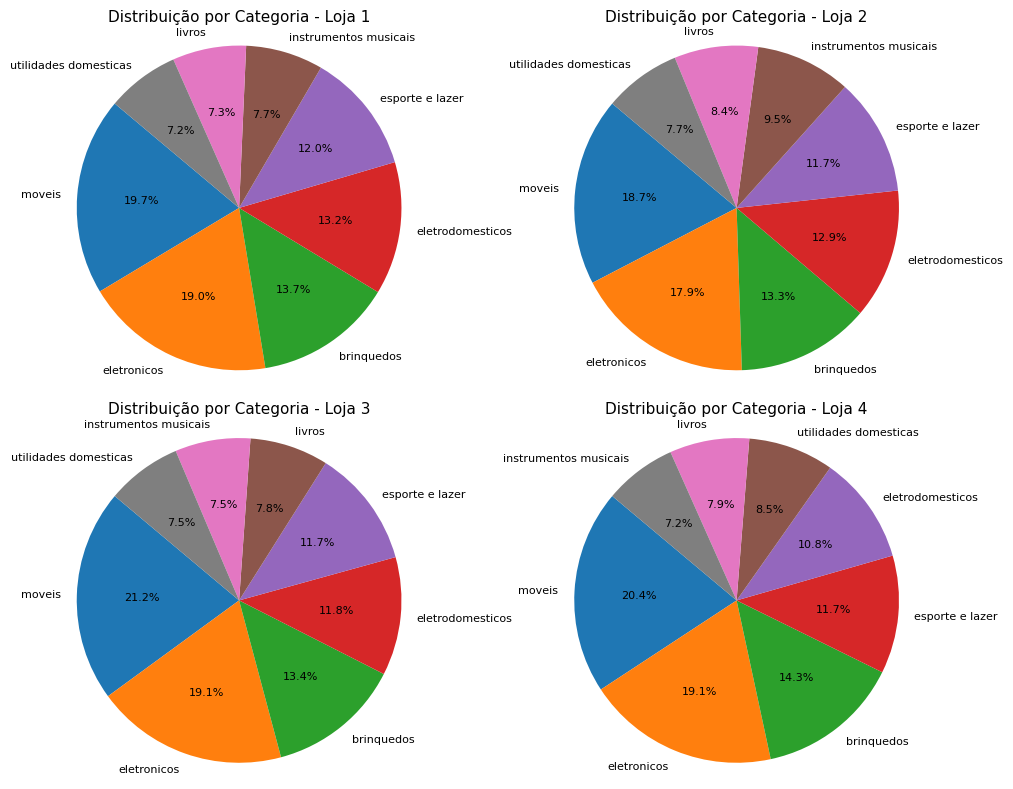

In [8]:
# Criar subplots 2x2 com gráficos de pizza
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Lista de dados e títulos
dados_categorias = [categorias_loja1, categorias_loja2, categorias_loja3, categorias_loja4]
titulos = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criar os gráficos de pizza
for i, ax in enumerate(axs.flatten()):
    ax.pie(dados_categorias[i]['Quantidade de Vendas'],
           labels=dados_categorias[i]['Categoria'],
           autopct='%1.1f%%',
           startangle=140,
           textprops={'fontsize': 8})
    ax.axis('equal')
    ax.set_title(f'Distribuição por Categoria - {titulos[i]}', fontsize=11)

plt.tight_layout()
plt.show()



# 3. Média de Avaliação das Lojas



In [9]:
# Cálculo da média das avaliações por loja
media_avaliacao_loja1 = loja1["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()

# Exibição formatada com duas casas decimais
print(f"Média de Avaliações - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliações - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliações - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliações - Loja 4: {media_avaliacao_loja4:.2f}")


Média de Avaliações - Loja 1: 3.98
Média de Avaliações - Loja 2: 4.04
Média de Avaliações - Loja 3: 4.05
Média de Avaliações - Loja 4: 4.00


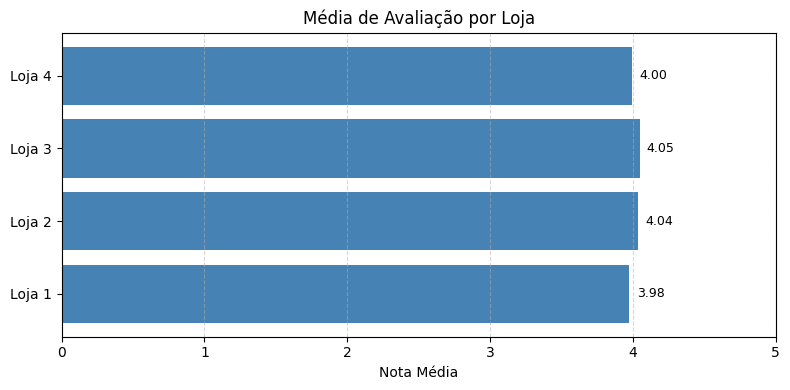

In [10]:
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

plt.figure(figsize=(8,4))
barras = plt.barh(nomes_lojas, avaliacoes, color="steelblue")
plt.xlabel("Nota Média")
plt.title("Média de Avaliação por Loja")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlim(0, 5)
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.05, barra.get_y() + barra.get_height()/2,
             f"{largura:.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()



# 3.1 - Distribuição das avaliações por Loja


In [11]:
# Distribuição das avaliações por loja

avaliacoes_loja1 = loja1['Avaliação da compra'].value_counts().sort_index()
avaliacoes_loja2 = loja2['Avaliação da compra'].value_counts().sort_index()
avaliacoes_loja3 = loja3['Avaliação da compra'].value_counts().sort_index()
avaliacoes_loja4 = loja4['Avaliação da compra'].value_counts().sort_index()

print("Distribuição de Avaliações - Loja 1:\n", avaliacoes_loja1, "\n")
print("Distribuição de Avaliações - Loja 2:\n", avaliacoes_loja2, "\n")
print("Distribuição de Avaliações - Loja 3:\n", avaliacoes_loja3, "\n")
print("Distribuição de Avaliações - Loja 4:\n", avaliacoes_loja4, "\n")


Distribuição de Avaliações - Loja 1:
 Avaliação da compra
1     319
2      86
3     218
4     444
5    1292
Name: count, dtype: int64 

Distribuição de Avaliações - Loja 2:
 Avaliação da compra
1     273
2      93
3     209
4     482
5    1302
Name: count, dtype: int64 

Distribuição de Avaliações - Loja 3:
 Avaliação da compra
1     297
2      79
3     193
4     434
5    1356
Name: count, dtype: int64 

Distribuição de Avaliações - Loja 4:
 Avaliação da compra
1     310
2      85
3     210
4     453
5    1300
Name: count, dtype: int64 



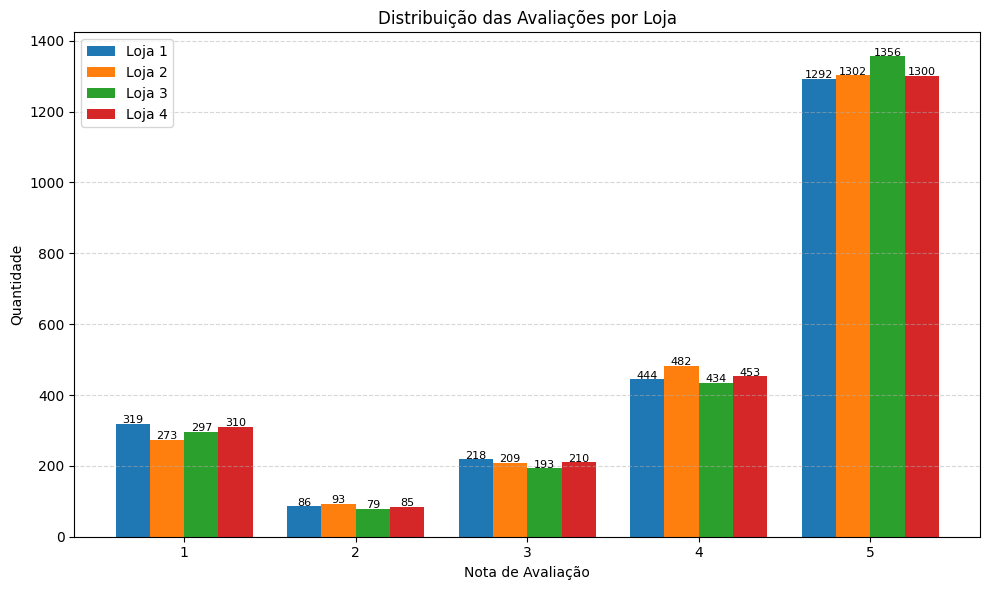

In [12]:
# Contagem de avaliações por nota (1 a 5) para cada loja
dist1 = loja1['Avaliação da compra'].value_counts().sort_index()
dist2 = loja2['Avaliação da compra'].value_counts().sort_index()
dist3 = loja3['Avaliação da compra'].value_counts().sort_index()
dist4 = loja4['Avaliação da compra'].value_counts().sort_index()

# Unificando os índices (de 1 a 5) para garantir que todos tenham todas as notas
notas = [1, 2, 3, 4, 5]
dist1 = dist1.reindex(notas, fill_value=0)
dist2 = dist2.reindex(notas, fill_value=0)
dist3 = dist3.reindex(notas, fill_value=0)
dist4 = dist4.reindex(notas, fill_value=0)

# Configuração do gráfico
bar_width = 0.2
x = range(len(notas))

plt.figure(figsize=(10,6))

plt.bar([i - 1.5*bar_width for i in x], dist1, width=bar_width, label='Loja 1')
plt.bar([i - 0.5*bar_width for i in x], dist2, width=bar_width, label='Loja 2')
plt.bar([i + 0.5*bar_width for i in x], dist3, width=bar_width, label='Loja 3')
plt.bar([i + 1.5*bar_width for i in x], dist4, width=bar_width, label='Loja 4')

# Rótulos e legendas
plt.xlabel('Nota de Avaliação')
plt.ylabel('Quantidade')
plt.title('Distribuição das Avaliações por Loja')
plt.xticks(ticks=x, labels=notas)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar valores acima das barras
for i in x:
    # Use .iloc[i] para acessar pelo índice posicional
    plt.text(i - 1.5*bar_width, dist1.iloc[i] + 2, dist1.iloc[i], ha='center', fontsize=8)
    plt.text(i - 0.5*bar_width, dist2.iloc[i] + 2, dist2.iloc[i], ha='center', fontsize=8)
    plt.text(i + 0.5*bar_width, dist3.iloc[i] + 2, dist3.iloc[i], ha='center', fontsize=8)
    plt.text(i + 1.5*bar_width, dist4.iloc[i] + 2, dist4.iloc[i], ha='center', fontsize=8)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [13]:
# Função para exibir top 5 produtos mais e menos vendidos de cada uma das loja
def exibir_top5_vendas(df_loja, nome_loja):
    contagem = df_loja["Produto"].value_counts()

    top_mais_vendidos = contagem.head(5)
    top_menos_vendidos = contagem.tail(5)

    print(f"\n===== {nome_loja} =====")

    print("\n>> Top 5 Produtos MAIS vendidos:")
    for produto, qtd in top_mais_vendidos.items():
        print(f"- {produto}: {qtd} vendas")

    print("\n>> Top 5 Produtos MENOS vendidos:")
    for produto, qtd in top_menos_vendidos.items():
        print(f"- {produto}: {qtd} venda(s)")

# Aplicar a função para cada loja
exibir_top5_vendas(loja1, "Loja 1")
exibir_top5_vendas(loja2, "Loja 2")
exibir_top5_vendas(loja3, "Loja 3")
exibir_top5_vendas(loja4, "Loja 4")


===== Loja 1 =====

>> Top 5 Produtos MAIS vendidos:
- Micro-ondas: 60 vendas
- TV Led UHD 4K: 60 vendas
- Guarda roupas: 60 vendas
- Secadora de roupas: 58 vendas
- Cômoda: 56 vendas

>> Top 5 Produtos MENOS vendidos:
- Ciência de dados com python: 39 venda(s)
- Pandeiro: 36 venda(s)
- Panela de pressão: 35 venda(s)
- Headset: 33 venda(s)
- Celular ABXY: 33 venda(s)

===== Loja 2 =====

>> Top 5 Produtos MAIS vendidos:
- Iniciando em programação: 65 vendas
- Micro-ondas: 62 vendas
- Bateria: 61 vendas
- Violão: 58 vendas
- Pandeiro: 58 vendas

>> Top 5 Produtos MENOS vendidos:
- Fone de ouvido: 37 venda(s)
- Poltrona: 35 venda(s)
- Mesa de jantar: 34 venda(s)
- Impressora: 34 venda(s)
- Jogo de tabuleiro: 32 venda(s)

===== Loja 3 =====

>> Top 5 Produtos MAIS vendidos:
- Kit banquetas: 57 vendas
- Mesa de jantar: 56 vendas
- Cama king: 56 vendas
- Jogo de panelas: 55 vendas
- Cômoda: 55 vendas

>> Top 5 Produtos MENOS vendidos:
- Guitarra: 38 venda(s)
- Jogo de copos: 36 venda(s)
- 

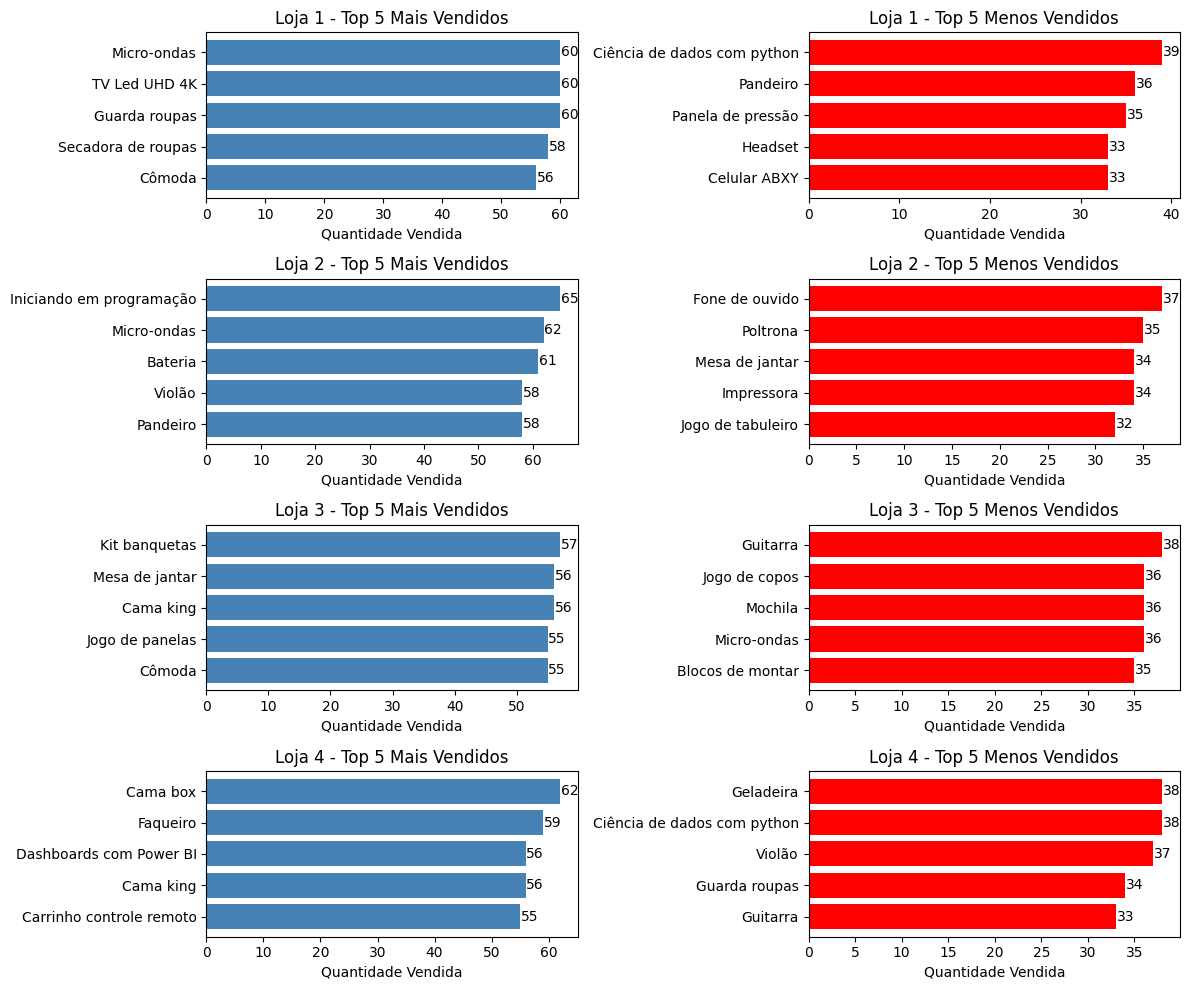

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(12, 10))

contagem_loja1 = loja1["Produto"].value_counts()
top_vendidos_loja1 = contagem_loja1.head(5)
menos_vendidos_loja1 = contagem_loja1.tail(5)

contagem_loja2 = loja2["Produto"].value_counts()
top_vendidos_loja2 = contagem_loja2.head(5)
menos_vendidos_loja2 = contagem_loja2.tail(5)

contagem_loja3 = loja3["Produto"].value_counts()
top_vendidos_loja3 = contagem_loja3.head(5)
menos_vendidos_loja3 = contagem_loja3.tail(5)

contagem_loja4 = loja4["Produto"].value_counts()
top_vendidos_loja4 = contagem_loja4.head(5)
menos_vendidos_loja4 = contagem_loja4.tail(5)


tops_mais = [top_vendidos_loja1, top_vendidos_loja2, top_vendidos_loja3, top_vendidos_loja4]
tops_menos = [menos_vendidos_loja1, menos_vendidos_loja2, menos_vendidos_loja3, menos_vendidos_loja4]
titulos = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for i in range(4):
    # Mais vendidos
    axs[i, 0].barh(tops_mais[i].index, tops_mais[i].values, color='steelblue')
    axs[i, 0].invert_yaxis()
    axs[i, 0].set_title(f'{titulos[i]} - Top 5 Mais Vendidos')
    axs[i, 0].set_xlabel('Quantidade Vendida')

    for index, value in enumerate(tops_mais[i].values):
        axs[i, 0].text(value + 0.1, index, str(value), va='center')

    # Menos vendidos
    axs[i, 1].barh(tops_menos[i].index, tops_menos[i].values, color='red')
    axs[i, 1].invert_yaxis()
    axs[i, 1].set_title(f'{titulos[i]} - Top 5 Menos Vendidos')
    axs[i, 1].set_xlabel('Quantidade Vendida')

    for index, value in enumerate(tops_menos[i].values):
        axs[i, 1].text(value + 0.1, index, str(value), va='center')

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [15]:
def custo_medio_frete(df_loja, nome_loja):
    frete_medio = df_loja["Frete"].mean()
    frete_formatado = f"R$ {frete_medio:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    print(f"{nome_loja} - Custo médio de frete: {frete_formatado}")

custo_medio_frete(loja1, "Loja 1")
custo_medio_frete(loja2, "Loja 2")
custo_medio_frete(loja3, "Loja 3")
custo_medio_frete(loja4, "Loja 4")


Loja 1 - Custo médio de frete: R$ 34,69
Loja 2 - Custo médio de frete: R$ 33,62
Loja 3 - Custo médio de frete: R$ 33,07
Loja 4 - Custo médio de frete: R$ 31,28


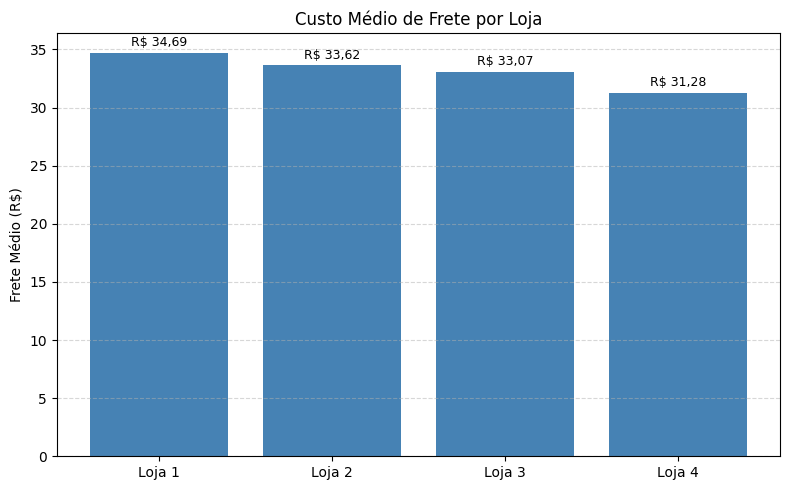

In [16]:
# Calcular frete médio por loja
fretes = [
    loja1["Frete"].mean(),
    loja2["Frete"].mean(),
    loja3["Frete"].mean(),
    loja4["Frete"].mean()
]

plt.figure(figsize=(8,5))
barras = plt.bar(nomes_lojas, fretes, color="steelblue")
plt.title("Custo Médio de Frete por Loja")
plt.ylabel("Frete Médio (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + altura*0.01,
             f"R$ {altura:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()



# 6. Ticket Médio por Loja

In [17]:
# Ticket médio por loja
ticket_medio1 = loja1['Preço'].mean()
ticket_medio2 = loja2['Preço'].mean()
ticket_medio3 = loja3['Preço'].mean()
ticket_medio4 = loja4['Preço'].mean()

print("Ticket Médio Loja 1:", f"R$ {ticket_medio1:,.2f}".replace(",", "v").replace(".", ",").replace("v", "."))
print("Ticket Médio Loja 2:", f"R$ {ticket_medio2:,.2f}".replace(",", "v").replace(".", ",").replace("v", "."))
print("Ticket Médio Loja 3:", f"R$ {ticket_medio3:,.2f}".replace(",", "v").replace(".", ",").replace("v", "."))
print("Ticket Médio Loja 4:", f"R$ {ticket_medio4:,.2f}".replace(",", "v").replace(".", ",").replace("v", "."))

Ticket Médio Loja 1: R$ 650,49
Ticket Médio Loja 2: R$ 630,97
Ticket Médio Loja 3: R$ 620,61
Ticket Médio Loja 4: R$ 587,15


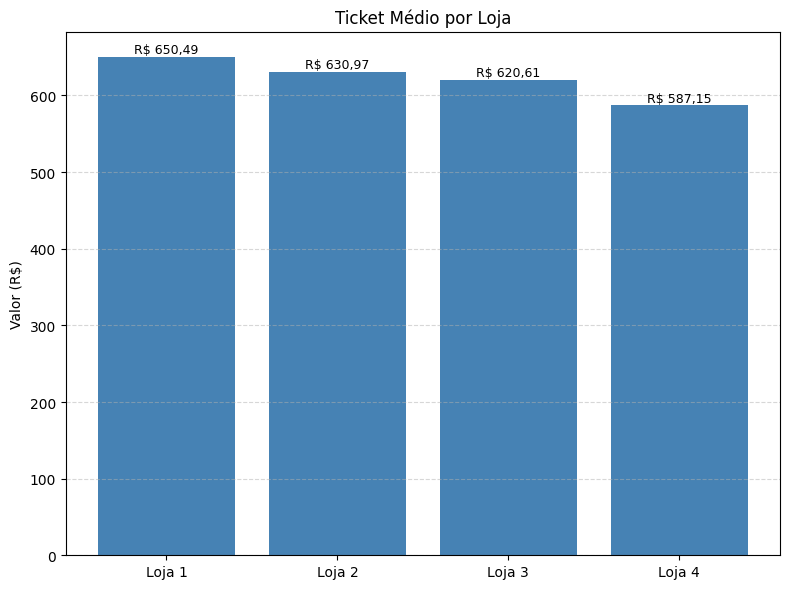

In [18]:
# Dados para o gráfico
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
tickets = [ticket_medio1, ticket_medio2, ticket_medio3, ticket_medio4]

# Gráfico de barras
plt.figure(figsize=(8,6))
barras = plt.bar(lojas, tickets, color='steelblue')

# Título e rótulos
plt.title('Ticket Médio por Loja')
plt.ylabel('Valor (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Rótulos nos topos das barras
for barra in barras:
    valor = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, valor + 1,
             f'R$ {valor:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



#📊 Relatório de Análise de Desempenho – Lojas do Sr. João

Objetivo: Indicar, com base nos dados disponíveis, qual das quatro lojas deve ser vendida por apresentar o pior desempenho geral.

#🔍 Resumo das Análises Realizadas

##Faturamento Total:

Loja 1: R$ 1.534.509,12

Loja 2: R$ 1.488.459,06

Loja 3: R$ 1.464.025,03

Loja 4: R$ 1.384.497,58



#Quantidade Total de Vendas:

Todas as lojas venderam praticamente a mesma quantidade (cerca de 2.359 pedidos cada), o que elimina esse critério como diferencial decisivo.

##Ticket Médio:

Loja 1: R$ 650,49

Loja 2: R$ 630,97

Loja 3: R$ 620,61

Loja 4: R$ 587,15




➤ Loja 4 possui o menor valor médio por pedido, o que impacta negativamente no faturamento.


##Custo Médio de Frete:

Loja 1: R$ 34,69

Loja 2: R$ 33,62

Loja 3: R$ 33,07

Loja 4: R$ 31,28





➤ A diferença entre o custo de frete pode ser justificada pelo ticket médio.

##Média Geral das Avaliações:

Loja 1: 3.98

Loja 2: 4.04

Loja 3: 4.05

Loja 4: 4.00




➤ Diferenças pequenas, não decisivas individualmente.

##Distribuição das Avaliações:




Todas as lojas têm padrões semelhantes, com predominância de avaliações 4 e 5 estrelas.

##Tendência de Faturamento ao Longo do Tempo:

Loja 1: Leve tendência de queda, mas com alto faturamento.

Loja 2: Tendência de crescimento.

Loja 3: Tendência estável.

Loja 4: Tendência clara e acentuada de queda no faturamento.



#✅ Conclusão e Recomendação
Com base nas análises realizadas, a recomendação é vender a Loja 4.

Ela apresenta:

O menor faturamento total;

O menor ticket médio;

Tendência de queda contínua no faturamento ao longo do tempo.

##⚠️ Observação Final

Para uma tomada de decisão mais precisa, seria importante ter acesso a outros dados relevantes, como:

Custos fixos e variáveis;

Rentabilidade líquida;

Investimentos em marketing;

Margem por categoria de produto.

Contudo, com base exclusivamente nas informações disponíveis, a Loja 4 é a escolha mais indicada para ser vendida.

